In [0]:
import torch

#Subpackage for neural network building
import torch.nn as nn

#Subpackage for optimization like Adam or SGD
import torch.optim as optim

#Interface that contains operations for building neural network
import torch.nn.functional as F

#Package that provides access to popular datasets, model, architectures & images transfo.
import torchvision

#Interface that contains common transforms for image processing
import torchvision.transforms as transforms

In [0]:
#Packages standard utilisés en data science en Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import pdb #Python debugger

torch.set_printoptions(linewidth=120)

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root='./'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])

)

0it [00:00, ?it/s]

26427392it [00:06, 3830988.54it/s]                               


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 103328.08it/s]           
0it [00:00, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


4423680it [00:01, 4313341.93it/s]                             
0it [00:00, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


8192it [00:00, 31831.76it/s]            

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(train_set
                                          ,batch_size=1000
                                          ,shuffle=True
                                          )

In [5]:
len(train_set)

60000

In [6]:
train_set.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
#Voir combien il y a de labels dans le dataset
train_set.train_labels.bincount()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [8]:
#Permet de voir combien d'items il y a. On obtient 2 : pour images et labels

#iter permet d'accéder à un élément individuellement
#next permet d'avoir la data suivante, sans doute pour comparer
sample = next(iter(train_set))
print('len:', len(sample))
print('type:', type(sample))

len: 2
type: <class 'tuple'>


In [12]:
image, label = sample
print('types image & labels:', type(image), type(label))

types image & labels: <class 'torch.Tensor'> <class 'int'>


In [16]:
#Avoir les dimensions de l'image
print('shape :', image.shape, label.shape

SyntaxError: ignored

In [17]:
print('Squeeze:', image.squeeze().shape)

Squeeze: torch.Size([28, 28])


label: 9


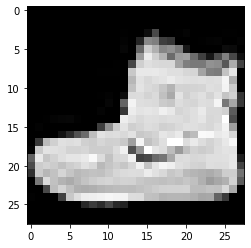

In [18]:
plt.imshow(image.squeeze(), cmap="gray")
print('label:', label)

In [0]:
#Permet de savoir/tester avec combien de types d'images & labels on travaille
display_loader = torch.utils.data.DataLoader(
  train_set, batch_size=10
)

In [21]:
batch = next(iter(display_loader))
print('len:', len(batch))

len: 2


In [22]:
images, labels = batch

print('types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


In [23]:
images[0].shape

torch.Size([1, 28, 28])

In [24]:
labels[0]

tensor(9)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


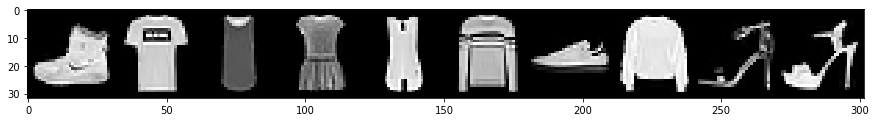

In [25]:
#Affichage des items et numéros de tenseur
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

In [0]:
#Classe neural network
class Network:
  def __intit__(self):
      self.layer = None
      
  def forward(self, t):
    t = self.layer(t)
    return t

In [0]:
#Classe Pytorch neural network
#Réseau à 5 couches
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        #kernel_size: fixe la taille du filtre, out_channels: fixe le nb de filtres
        #out_features: fixe la taille de la sortie du tenseur
        #in_channels: nb de couleurs
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        #fc = dense = connected layers
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        #out car derniere couche = sortie
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement the forward pass
        return t

In [0]:
#Inspection des learnable parameters
network = Network()

In [30]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [31]:
#Acceder aux attributs: Convolutionnels ou Lineaires
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [0]:
network.conv1.weight

In [0]:
def __repr__(self):
  return 'Parameter containing:\n' + super(Parameter, self).__repr__()

In [0]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [34]:
#Weight Matrix
network.fc1.weight

Parameter containing:
tensor([[ 0.0086, -0.0312,  0.0683,  ..., -0.0615, -0.0638, -0.0396],
        [-0.0503, -0.0024, -0.0680,  ..., -0.0468, -0.0038,  0.0281],
        [-0.0061, -0.0165,  0.0384,  ...,  0.0666,  0.0535,  0.0291],
        ...,
        [-0.0534, -0.0717,  0.0647,  ...,  0.0562,  0.0252, -0.0457],
        [ 0.0127, -0.0493,  0.0216,  ..., -0.0193, -0.0224,  0.0440],
        [-0.0673, -0.0682,  0.0069,  ..., -0.0341,  0.0706,  0.0689]], requires_grad=True)

In [35]:
network.conv1.weight                                      

Parameter containing:
tensor([[[[-0.1490,  0.1699, -0.0192,  0.1230, -0.1439],
          [-0.0299,  0.0355, -0.1451, -0.0256, -0.1518],
          [ 0.0553,  0.1091,  0.0286, -0.1839, -0.1362],
          [ 0.1091, -0.1699,  0.1193, -0.0342, -0.0505],
          [ 0.0284,  0.1173,  0.1307,  0.1105,  0.1271]]],


        [[[-0.0032,  0.0745,  0.0395,  0.1068, -0.1431],
          [ 0.1377,  0.1273, -0.0147, -0.0682,  0.0621],
          [-0.0957,  0.1346,  0.1536, -0.1603,  0.1000],
          [ 0.0176,  0.0260,  0.1535, -0.1451,  0.0881],
          [ 0.1801, -0.1054,  0.0514,  0.1671,  0.0849]]],


        [[[ 0.1012, -0.0157,  0.0421,  0.1910, -0.1243],
          [-0.0935, -0.0847, -0.1687,  0.0976, -0.0199],
          [ 0.0637,  0.1088, -0.1406, -0.0985, -0.0322],
          [-0.1503, -0.1756, -0.1550,  0.1181,  0.0308],
          [-0.0686, -0.0978,  0.0025, -0.0255, -0.0563]]],


        [[[ 0.0350, -0.0969,  0.0344, -0.0607,  0.0248],
          [-0.0815, -0.0109, -0.0887, -0.1053, -0.1685